In [88]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans


In [89]:
data = pd.read_csv('/Users/mac/Desktop/creditcard.csv')


In [90]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Description

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Class Distribution

In [92]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

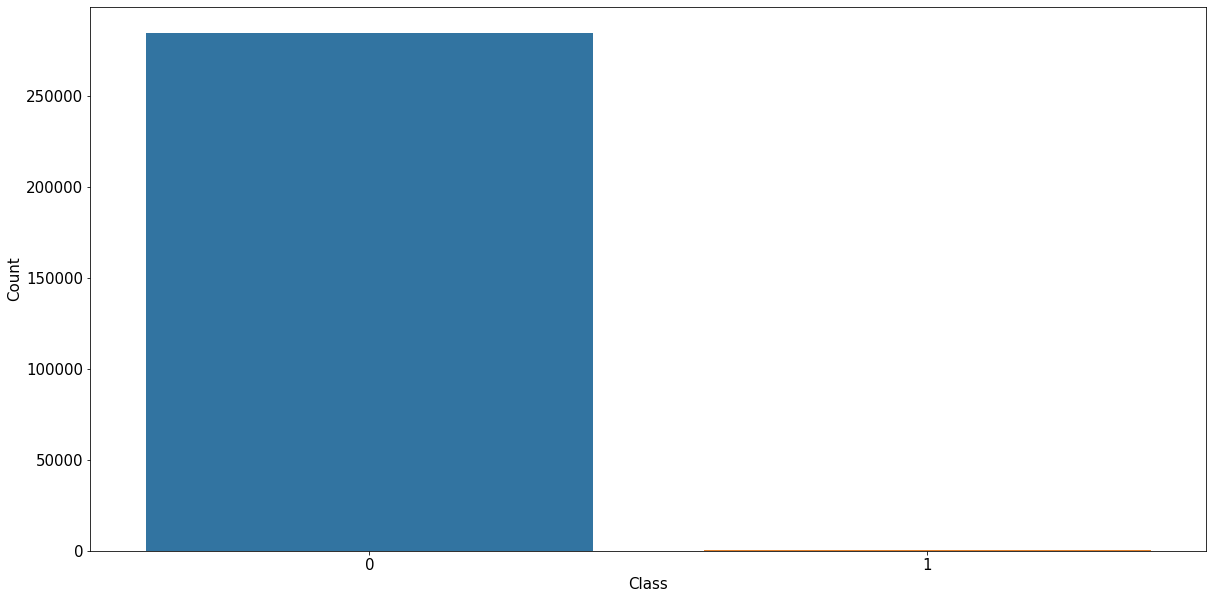

In [93]:
plt.figure(figsize=(20,10))
sn.countplot(x="Class", data=data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Pre-processing

### Null Values

In [94]:
## Finding null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values the deal with in this dataset.

### Duplicates

In [95]:
## Finding and removing duplicates

data.duplicated().sum()

1081

In [96]:
data.drop_duplicates(inplace=True)

In [97]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

After finding an deleting the duplicate rows in the dataset, we notice a difference of {0: -1062, 1: -19}

### Rebalancing the Dataset with SMOTE

We chose to use a SMOTE oversampler for the minority class (Explain how it works), with a RandomUndersampler from (module name) with ratios 0.3 and 0.9 respectively.

!! Please run the Data Split section before this one !!

Features Mean:  [ 9.48110776e+04  5.91714984e-03 -4.13475563e-03  1.61311936e-03
 -2.96630772e-03  1.82756011e-03 -1.13948819e-03  1.80069177e-03
 -8.54452573e-04 -1.59619962e-03 -1.44071049e-03  2.01757640e-04
 -7.14787657e-04  6.03375791e-04  2.52317301e-04  1.04283805e-03
  1.16201282e-03  1.70160945e-04  1.51516601e-03 -2.64263588e-04
  1.87175247e-04 -3.70593123e-04 -1.50275632e-05  1.98170724e-04
  2.14206824e-04 -2.32386990e-04  1.49441088e-04  1.76303162e-03
  5.47312101e-04  8.84726873e+01] 

Features Std: [4.74809642e+04 1.94802271e+00 1.64670006e+00 1.50867926e+00
 1.41418152e+00 1.37700585e+00 1.33192824e+00 1.22766173e+00
 1.17905235e+00 1.09549055e+00 1.07640545e+00 1.01871836e+00
 9.94672692e-01 9.95427883e-01 9.52213412e-01 9.14892021e-01
 8.73694788e-01 8.42505836e-01 8.37376054e-01 8.13377120e-01
 7.69982884e-01 7.23908091e-01 7.24549189e-01 6.23701279e-01
 6.05625631e-01 5.21219398e-01 4.82052091e-01 3.95743184e-01
 3.28026026e-01 2.50398996e+02] 



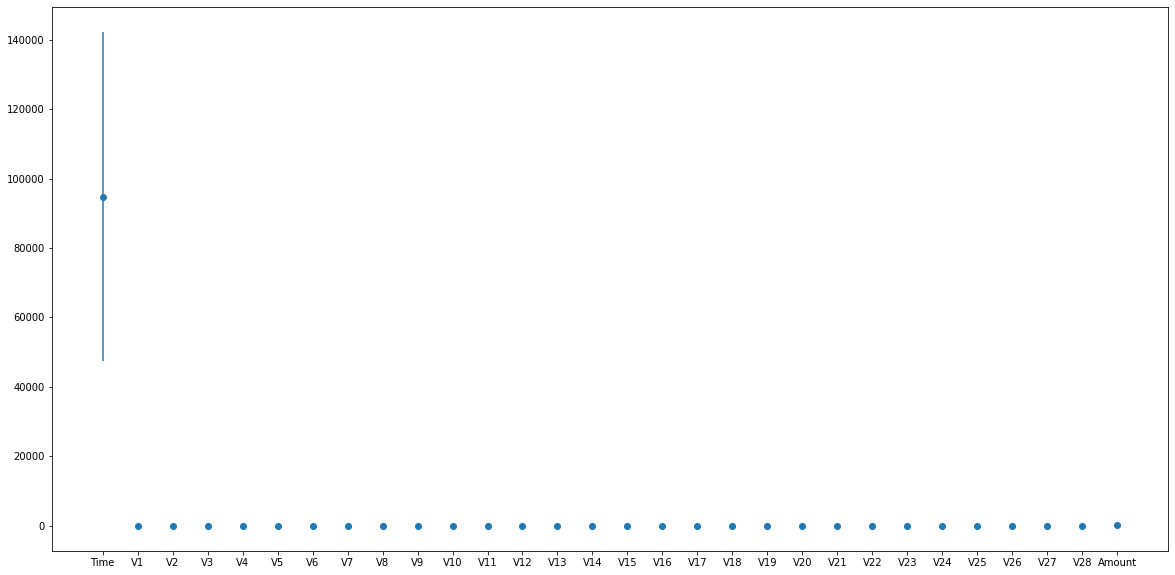

In [101]:
features_mean =features.mean(axis=0)
print("Features Mean: ", features_mean, "\n")
features_std = features.std(axis=0)
print("Features Std:", features_std, "\n")

plt.figure(figsize=(20,10))
plt.errorbar(np.array(list(feature_list)), features_mean, yerr = features_std, fmt='o',)
plt.show()

Features_zscore Mean:  [ 1.21810474e-16 -5.65977945e-17 -2.40415410e-18 -1.12193858e-16
  1.42245784e-17  3.36581574e-17  4.80830820e-18 -1.88325405e-17
 -1.14197320e-17 -3.19051284e-17  9.21592405e-18  2.72470798e-17
 -3.20553880e-18 -1.55268286e-17  1.20207705e-17  1.36235399e-17
 -1.90328866e-18  1.26218090e-17 -1.52263093e-17  1.25466792e-17
 -5.81003908e-18 -9.21592405e-18  1.92332328e-17  2.60450028e-18
  1.41244053e-17  4.00692350e-17 -1.20708570e-17 -5.86012562e-18
 -1.50259631e-19 -5.40934673e-17] 

Features_zscore Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] 



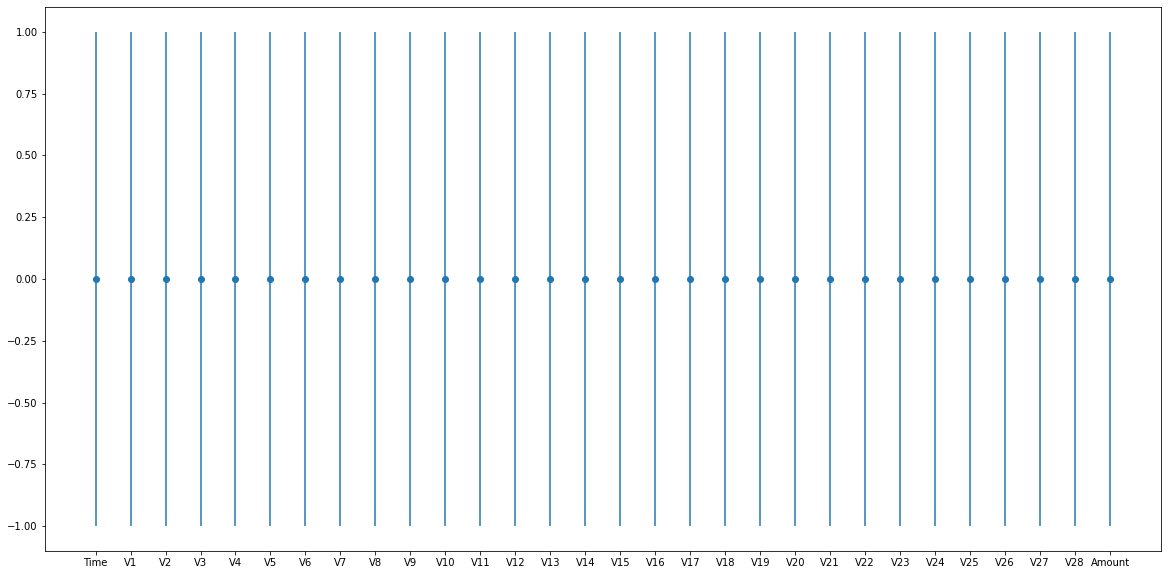

In [102]:
features_zscore = stats.zscore(features)
features_zscore_mean = features_zscore.mean(axis=0)
print("Features_zscore Mean: ", features_zscore_mean, "\n")
features_zscore_std = features_zscore.std(axis=0)
print("Features_zscore Std:", features_zscore_std, "\n")

plt.figure(figsize=(20,10))
plt.errorbar(np.array(list(feature_list)), features_zscore_mean, yerr= features_zscore_std, fmt='o')
plt.show()


In [103]:
counter = Counter(labels)
print("Count of labels before oversampling and undersampling:", counter)


Count of labels before oversampling and undersampling: Counter({0: 283253, 1: 473})


In [104]:
oversample = SMOTE(sampling_strategy=0.3)
undersample = RandomUnderSampler(sampling_strategy=0.9)
features_zscore, labels = oversample.fit_resample(features_zscore, labels)
features_zscore, labels = undersample.fit_resample(features_zscore, labels)

Count of labels before oversampling and undersampling: Counter({0: 94416, 1: 84975})


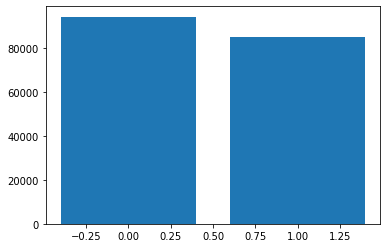

In [105]:
counter = Counter(labels)
print("Count of labels before oversampling and undersampling:", counter)
plt.bar(counter.keys(), counter.values())
plt.show()


In [155]:
## Generating damples for the app demo

In [136]:
i=0
max=0
fraud = []
for elt in features_zscore:
    if labels[i]==1:
        fraud.append(elt)
        max+=1
    i+=1
    if max == 20:
        break

In [137]:
i=0
max=0
normal= []
for elt in features_zscore:
    if labels[i]==0:
        normal.append(elt)
        max+=1
    i+=1
    if max == 30:
        break

In [143]:
demo_transactions = normal + fraud
len(demo_transactions)

50

In [144]:
import random
random.shuffle(demo_transactions)

In [145]:
import csv 
# field names 
features = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
rows = demo_transactions

with open('/Users/mac/Desktop/demo_transactions.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(features)
    write.writerows(rows)

# Feature Selection

### Correlation Matrix

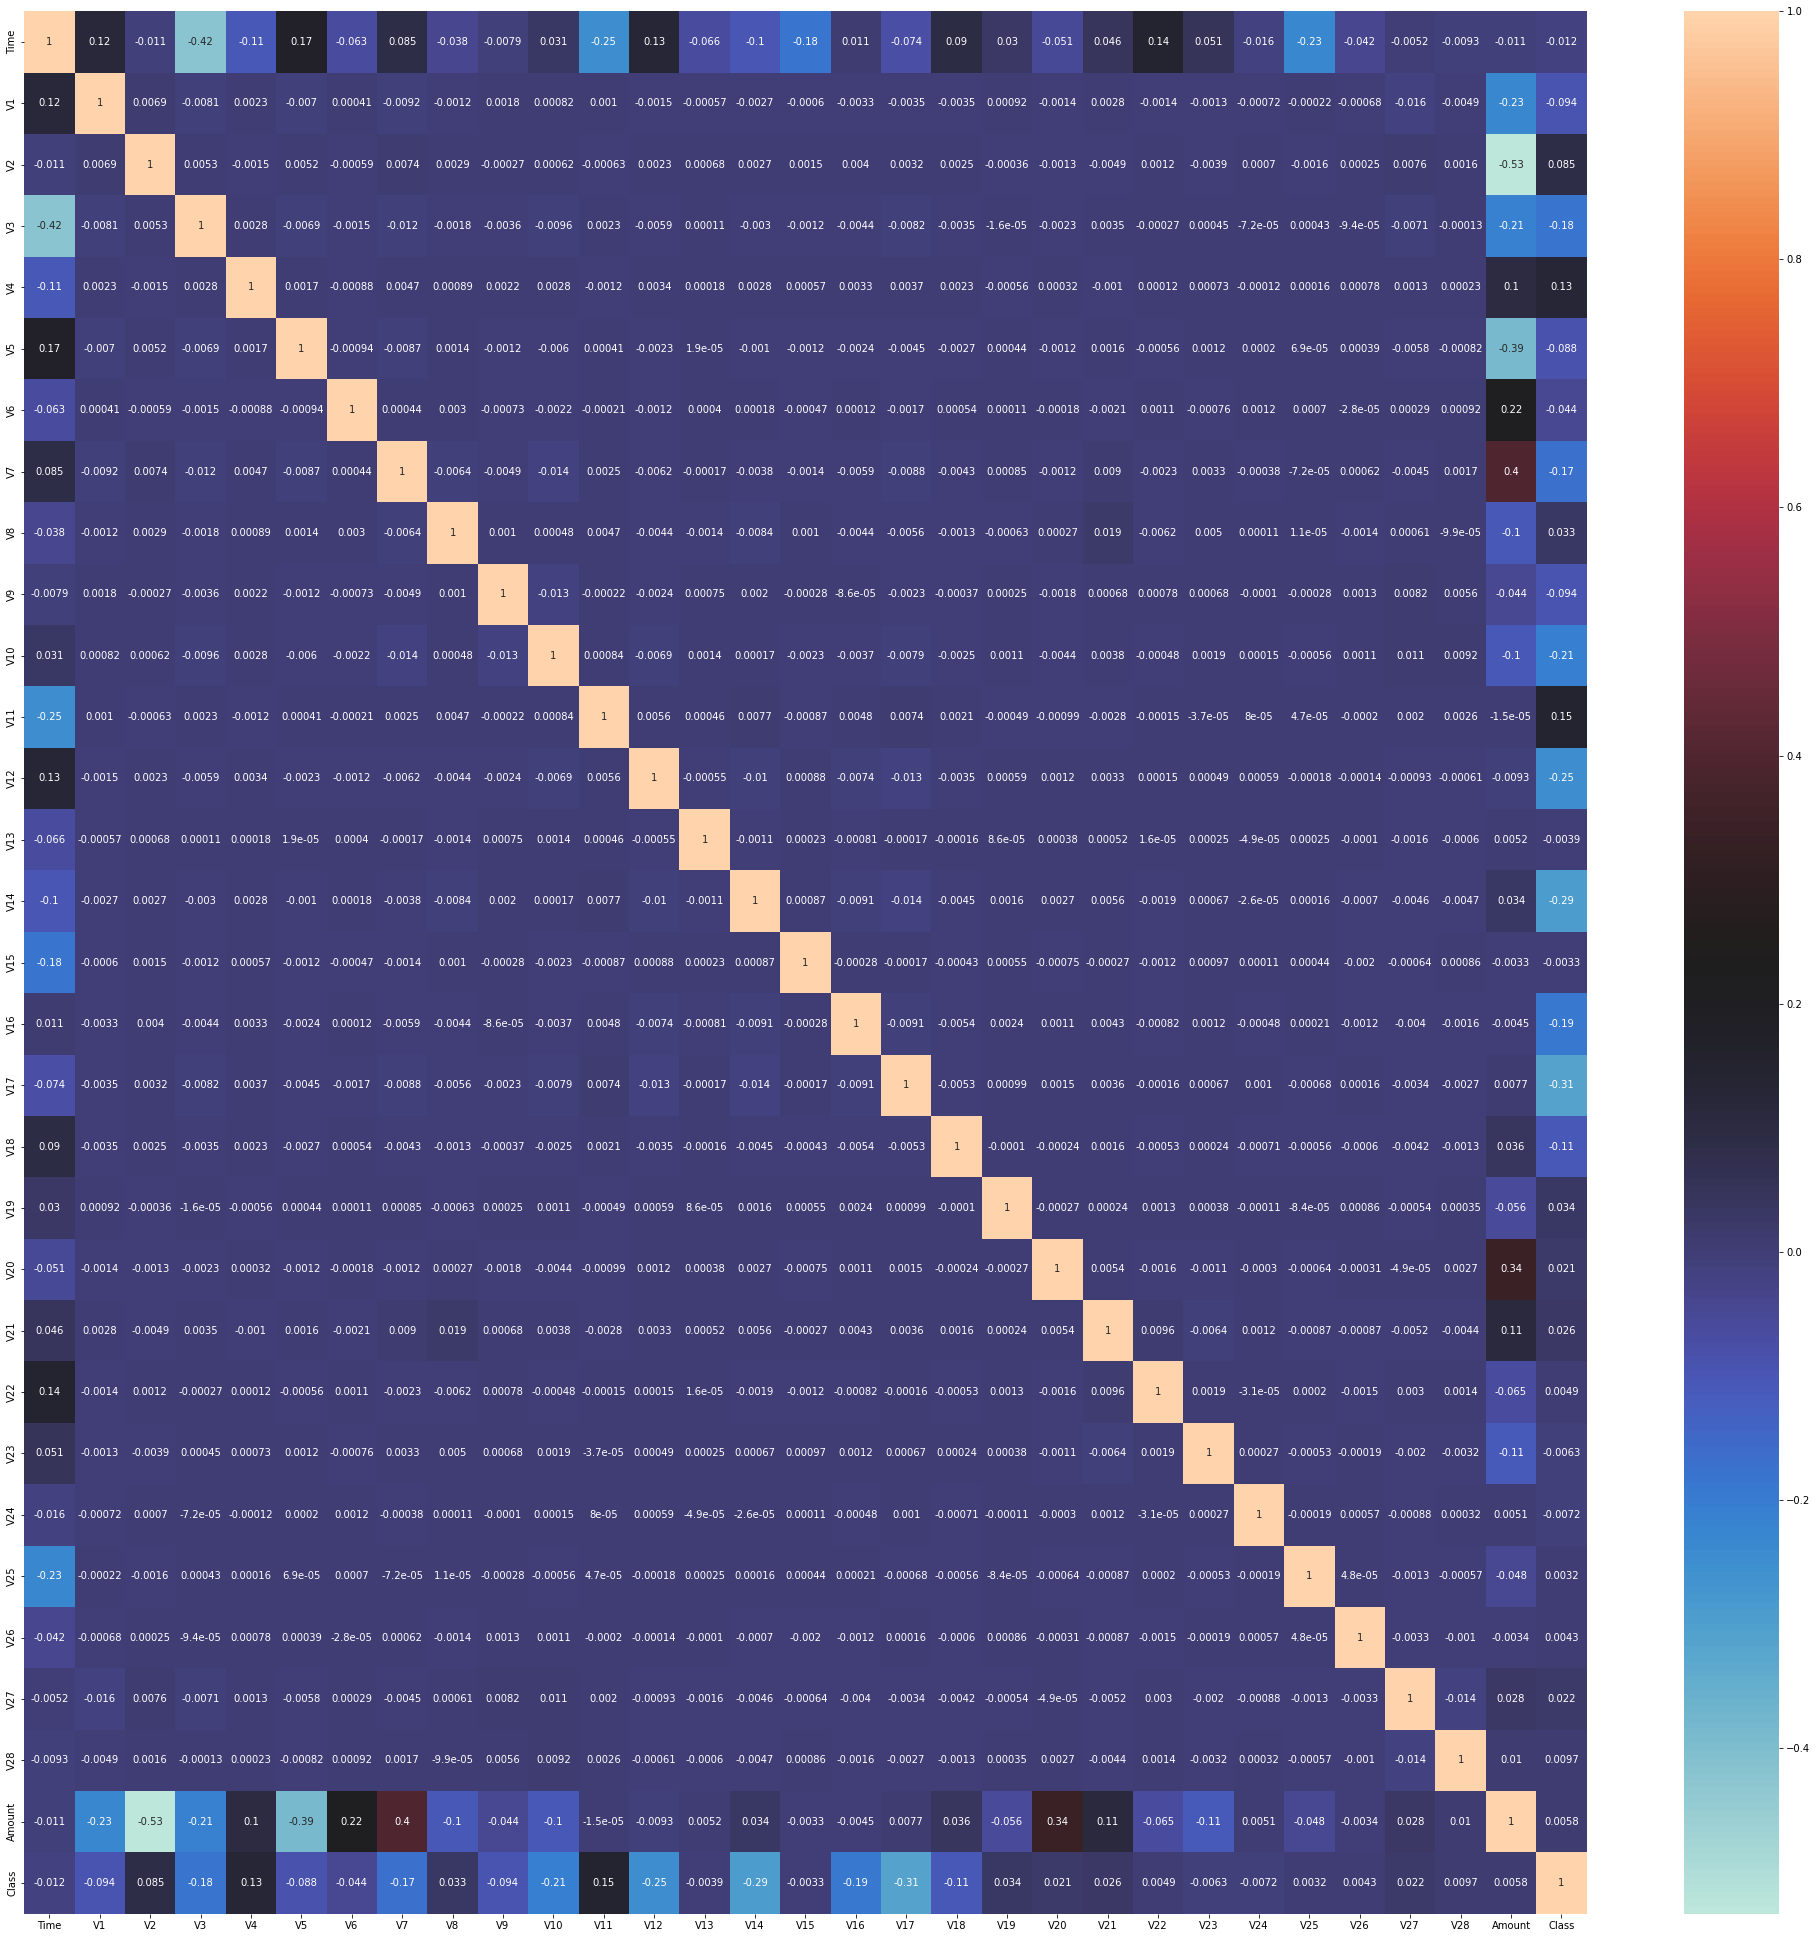

In [52]:
plt.figure(figsize = (35, 35))
sn.heatmap(data.corr(), annot=True, cmap = 'icefire')
plt.show()

### Plots

For a preliminary study of the features in the dataset, we can plot certain transactions with respect to the known (untransformed) features to see if there are noticable patterns.

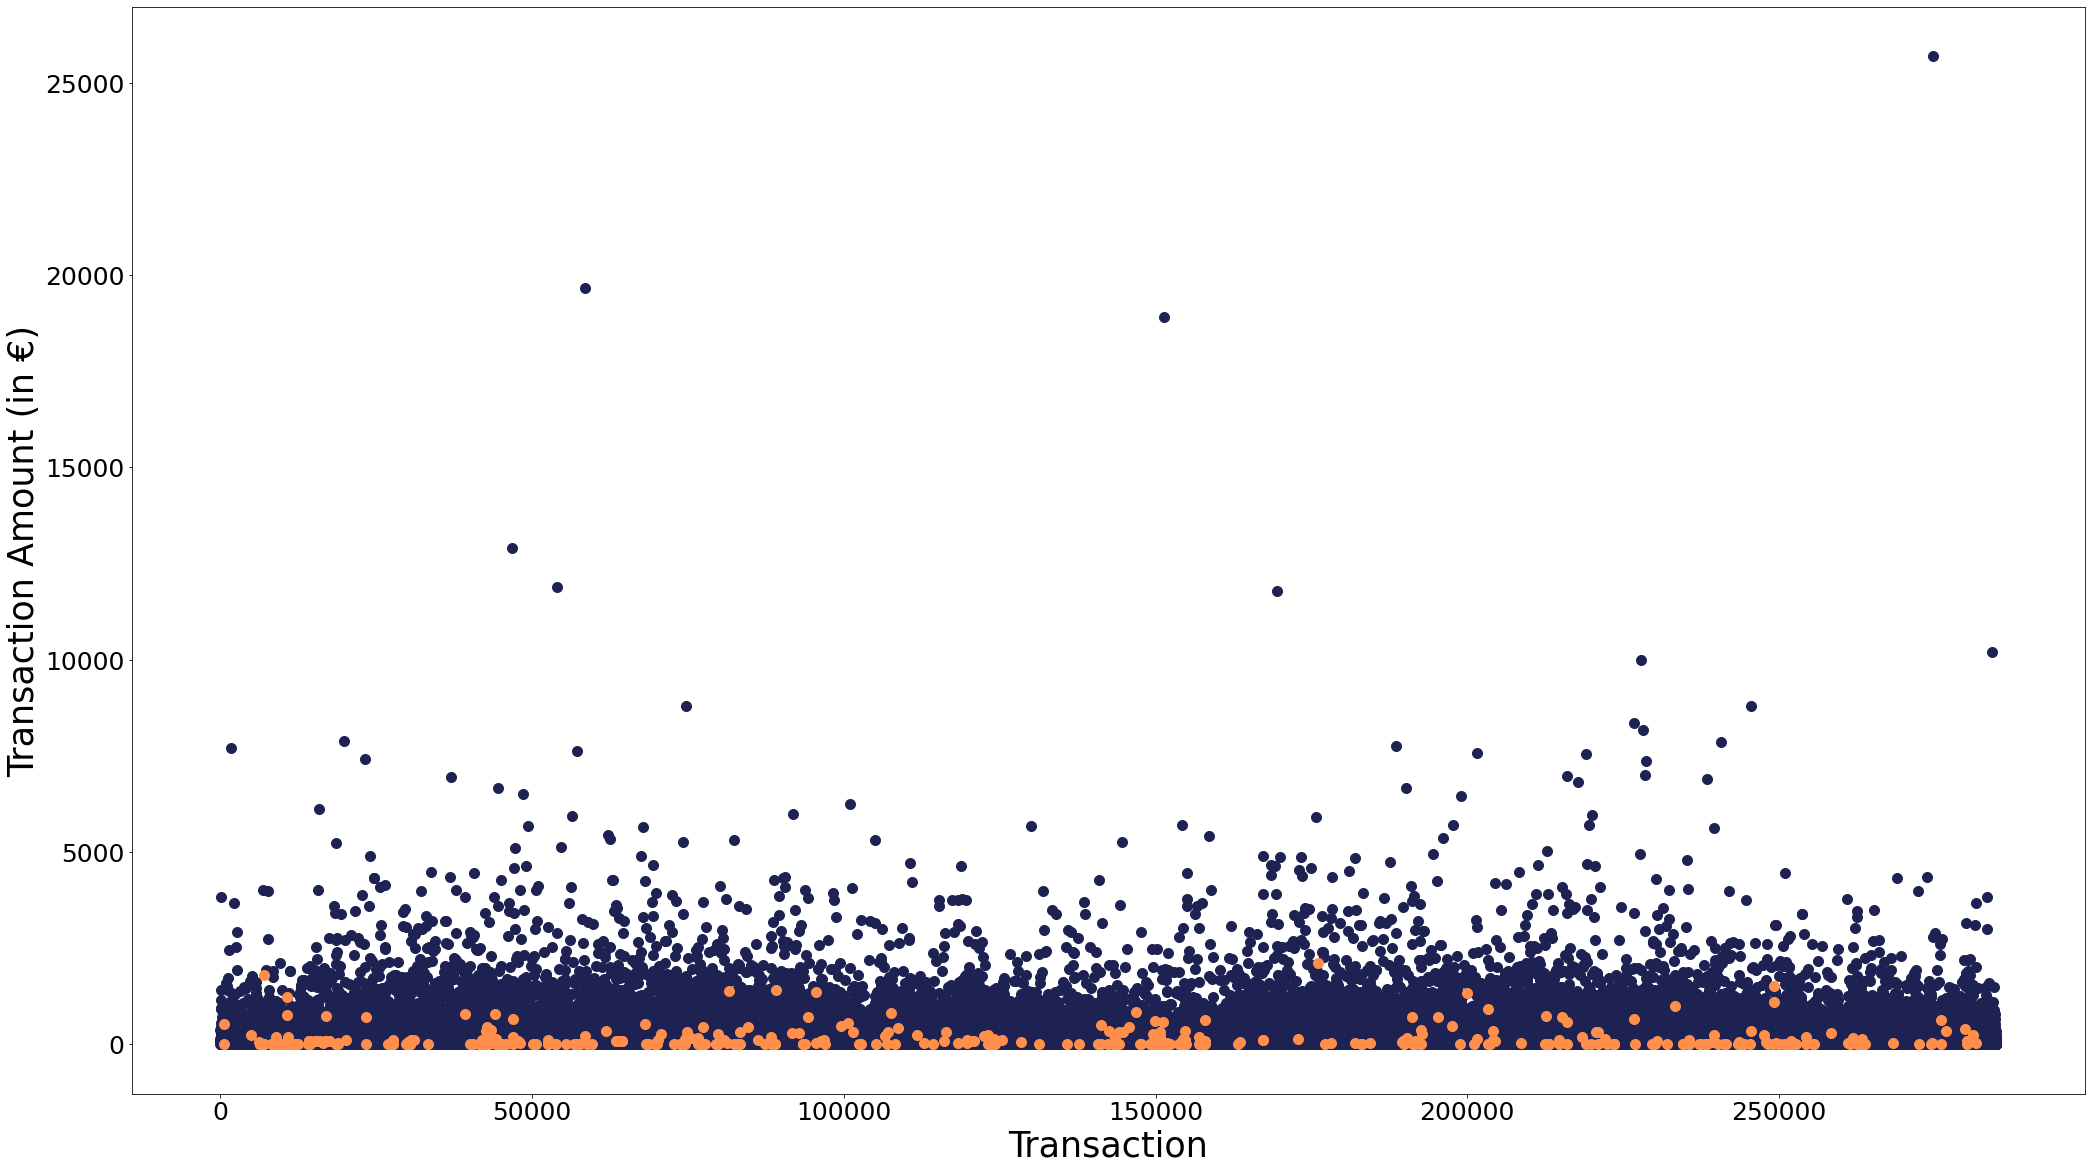

In [53]:
## Transaction class with respect to monetary amount
neg = data[data.Class==0]
pos = data[data.Class==1]

plt.figure(figsize= (35,20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Transaction Amount (in €)', fontsize=35)
plt.xlabel('Transaction', fontsize=35)

plt.scatter(pos.index, pos['Amount'], s= 100, zorder=2, color= '#ff8f4a')
plt.scatter(neg.index, neg['Amount'], s=100, zorder=1, color = '#1e2252')
# fig.update_layout(xaxis_title='Transaction Amount (in €)',yaxis_title='Transactions')
plt.show()

We can see that the monetary amount of the transaction doesn't tell us much about the class of transaction. Most fraudulant transactions are plotted overlapping the non-fraudulant ones. "Amount" is irrelevant in this Class prediction.

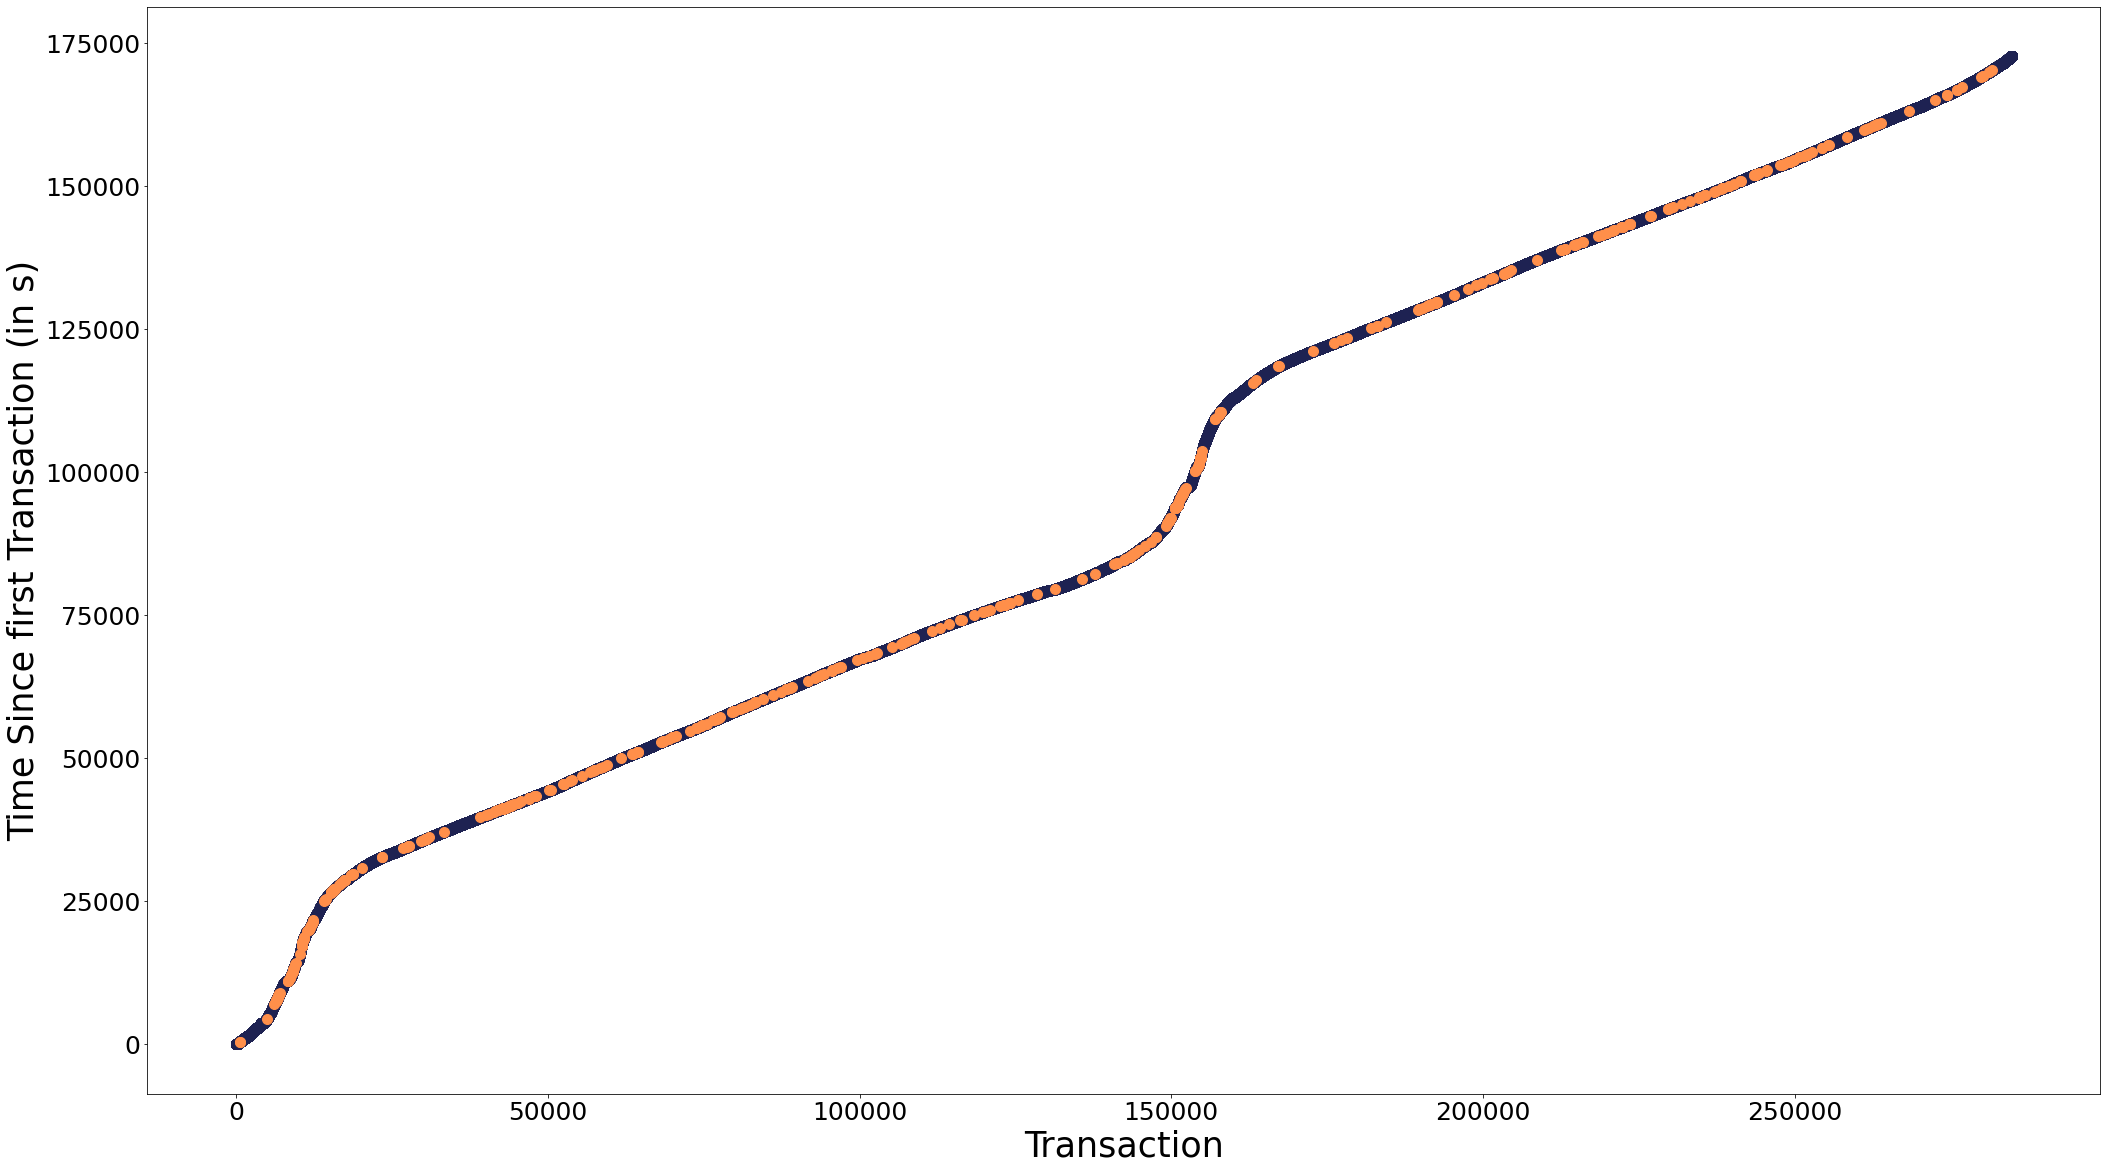

In [54]:
plt.figure(figsize= (35,20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Time Since first Transaction (in s)', fontsize=35)
plt.xlabel('Transaction', fontsize=35)

plt.scatter(pos.index, pos['Time'], s= 100, zorder=2, color= '#ff8f4a')
plt.scatter(neg.index, neg['Time'], s=100, zorder=1, color = '#1e2252')
# fig.update_layout(xaxis_title='Transaction Amount (in €)',yaxis_title='Transactions')
plt.show()

In the case of the "Time" column, the values are relative to the first transaction recorded. We can see that the fraudulant transactions were recorded all throughout the timeframe of the dataset, with no particular or periodic pattern. "Time" is irrelevant in this Class prediction.

# Classification

Classification is one of the methods to predict the class of these transactions. We chose Random forest as the algorithm to build our model with because it performed best in the Analysis phase of the project.

### Data Split

In [98]:
# Labels are the values we want to predict
labels = np.array(data['Class'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('Class', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [99]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.34, 
                                                                            random_state = 42)

In [100]:
#Looking at the shape of the data
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (187259, 30)
Training Labels Shape: (187259,)
Testing Features Shape: (96467, 30)
Testing Labels Shape: (96467,)


### Feature Selection with a Random Forest Model

In [71]:
#Feature Selection with Random Forest
sel = SelectFromModel(rf)
sel_rf = sel.fit(train_features, train_labels)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   18.1s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   47.7s finished


In [90]:
sel.get_support()
array = np.where(sel.get_support()== True)
selected_features = []
feature_array= np.array(feature_list)
for i in array:
    selected_features.append(feature_array[i])

(array([ 3,  4, 10, 11, 12, 14, 16, 17]),)

In [118]:
selected_features

[array(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='<U6')]

The features selected are the same as those selected on Weka via the CfSubsetEval. The selection doesn't improve accuracy or performance, in fact, the model seems to be more accurate when all features are included. 

### Random Forest Without Rebanlacing

In [98]:
# Train the model on training data
%time
model = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=2, oob_score= True).fit(train_features, 
                                                                                           train_labels)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 21.9 µs
building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   41.6s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.8min finished


In [99]:
# Use the forest's predict method on the test data
predictions = model.predict(test_features)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


In [100]:
# Performance metrics for Random Forest
metrics_random_forest = [['Accuracy',(accuracy_score(test_labels, predictions))],
                         ['Precision',precision_score(test_labels, predictions)],
                         ['Recall', recall_score(test_labels, predictions)],
                         ['F1_score',f1_score(test_labels, predictions)]]
metric_values_random_forest = pd.DataFrame(metrics_random_forest, columns = ['Metrics', 'Results'])
metric_values_random_forest

,Metrics,Results
0,Accuracy,0.999523
1,Precision,0.934959
2,Recall,0.751634
3,F1_score,0.833333


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

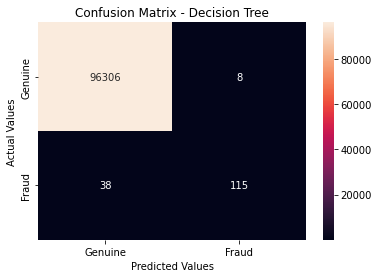

In [101]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, predictions)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

The confusion matrix is not reliable in the case of imbalanced datasets because while a ratio of 96307:7 is small for the negative class, 115:38 is pretty large for the positive class. Therefore the accuracy measure is not transparently evaluating the model as most of the classifaction is done on the class that has the most rows and training examples. 

To solve this problem, we will rebalance the dataset to have more or less the same number of instances for both classes. 

### Random Forest With Rebanlancing

In [106]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_zscore, labels, test_size = 0.34, random_state = 42)

In [107]:
#Looking at the shape of the data
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (118398, 30)
Training Labels Shape: (118398,)
Testing Features Shape: (60993, 30)
Testing Labels Shape: (60993,)


In [108]:
# Train the model on training data
%time
rf = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=2, oob_score= True)
model = rf.fit(train_features, train_labels)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs
building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   22.2s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   56.3s finished


In [109]:
# Use the forest's predict method on the test data
predictions = model.predict(test_features)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


In [110]:
# Performance metrics for Random Forest
metrics_random_forest = [['Accuracy',(accuracy_score(test_labels, predictions))],
                         ['Precision',precision_score(test_labels, predictions)],
                         ['Recall', recall_score(test_labels, predictions)],
                         ['F1_score',f1_score(test_labels, predictions)]]
metric_values_random_forest = pd.DataFrame(metrics_random_forest, columns = ['Metrics', 'Results'])
metric_values_random_forest

,Metrics,Results
0,Accuracy,0.999574
1,Precision,0.999344
2,Recall,0.999758
3,F1_score,0.999551


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

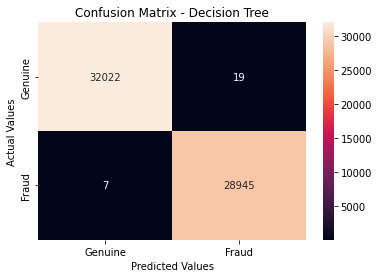

In [111]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, predictions)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

Now we can see that the ratio is much smaller for the positive class. This confusion matrix is therefore valid and the evaluation metrics are acceptable.

In [151]:
import pickle
filename = '/Users/mac/Desktop/card_fraud_rf.pkl'
pickle.dump(model, open(filename, 'wb'))

# Anomaly Detection

In [19]:
df1= data.sample(frac = 0.3,random_state=42)
df1.shape

(85118, 31)

In [20]:
#Calculate the contamination factor
ad_fraud = df1[df1['Class']==1]
ad_normal = df1[df1['Class']==0]
outlier_fraction = len(ad_fraud)/float(len(ad_normal))

In [21]:
# Labels are the values we want to predict
ad_labels = np.array(df1['Class'])
# Remove the labels from the features
# axis 1 refers to the columns
ad_features= df1.drop('Class', axis = 1)
# Saving feature names for later use
ad_feature_list = list(ad_features.columns)
# Convert to numpy array
ad_features = np.array(ad_features)

## Isolation Forest

In [31]:
#Model Creation
isof = IsolationForest(n_estimators=100, 
                       max_samples=len(ad_features), 
                       contamination=outlier_fraction, 
                       random_state=42, 
                       verbose=2)

In [47]:
#Fitting the model 
isof.fit(ad_features)
label_pred = isof.predict(ad_features)
scores_pred = isof.decision_function(ad_features)

#Calculating the number of errors
label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != ad_labels).sum()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


In [48]:
counter = Counter(label_pred)
print("Prediction Distribution:", counter)
print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(ad_labels,label_pred))
print("Classification Report: ")
print(classification_report(ad_labels, label_pred))

Prediction Distribution: Counter({0: 84983, 1: 135})
Errors:  187
Accuracy Score: 
0.9978030498836908
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.30      0.31      0.30       134

    accuracy                           1.00     85118
   macro avg       0.65      0.65      0.65     85118
weighted avg       1.00      1.00      1.00     85118



[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

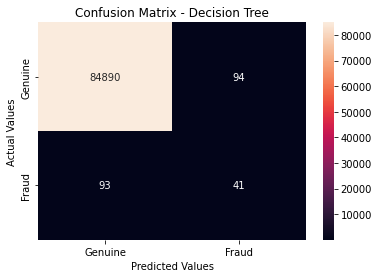

In [49]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(ad_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

## Local Outlier Factor

In [50]:
#Creating the model
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                         leaf_size=30, metric='minkowski',p=2, 
                         metric_params=None, contamination=outlier_fraction)

In [51]:
#Fitting the model over the data
label_pred = lof.fit_predict(ad_features)

#Calculating the number of errors
label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != ad_labels).sum()

In [52]:
print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(ad_labels,label_pred))
print("Classification Report: ")
print(classification_report(ad_labels,label_pred))

Errors:  265
Accuracy Score: 
0.9968866749688667
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.01      0.01      0.01       134

    accuracy                           1.00     85118
   macro avg       0.51      0.51      0.51     85118
weighted avg       1.00      1.00      1.00     85118



[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

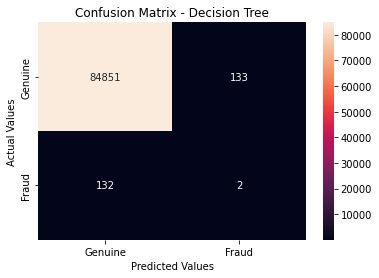

In [53]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(ad_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

## One Class SVM 

In [25]:
#Create the One Class SVM model
svm = OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)

In [23]:
svm.fit(ad_features)
label_pred = svm.predict(ad_features)

In [26]:
label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != ad_labels).sum()

print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(ad_labels,label_pred))
print("Classification Report: ")
print(classification_report(ad_labels,label_pred))

Errors:  34054
Accuracy Score: 
0.5999201109048615
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     84984
           1       0.00      0.41      0.00       134

    accuracy                           0.60     85118
   macro avg       0.50      0.51      0.38     85118
weighted avg       1.00      0.60      0.75     85118



## K Means Clustering

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(ad_features)

In [45]:
label_pred = kmeans.predict(test_features)

label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != test_labels).sum()

print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(test_labels,label_pred))
print("Classification Report: ")
print(classification_report(test_labels,label_pred))

Errors:  153
Accuracy Score: 
0.9984139653974935
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96314
           1       0.00      0.00      0.00       153

    accuracy                           1.00     96467
   macro avg       0.50      0.50      0.50     96467
weighted avg       1.00      1.00      1.00     96467



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

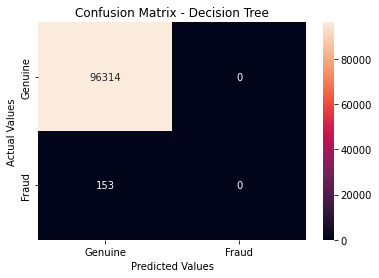

In [46]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])